<a href="https://colab.research.google.com/github/gkdivya/EVA/blob/main/7_AdvancedConcepts/experiments/CIFAR10_Image_Classification_WithSkipConnection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries

In [ ]:
!pip install git+https://github.com/albumentations-team/albumentations.git
!pip install torchsummary

  Cloning https://github.com/albumentations-team/albumentations.git to /tmp/pip-req-build-oxdl16ez
  Running command git clone -q https://github.com/albumentations-team/albumentations.git /tmp/pip-req-build-oxdl16ez
  Created wheel for albumentations: filename=albumentations-1.0.0-cp37-none-any.whl size=98151 sha256=5f1adf71a4753050c7391e9f08a1224c6c5afc6160fc6912136ff459c9efa1b2
  Stored in directory: /tmp/pip-ephem-wheel-cache-y23pb7zz/wheels/e2/85/3e/2a40fac5cc1f43ced656603bb2fca1327b30ec7de1b1b66517
Successfully built albumentations
  Found existing installation: albumentations 0.1.12
    Uninstalling albumentations-0.1.12:
      Successfully uninstalled albumentations-0.1.12


In [ ]:
from __future__ import print_function
BASE_DIR='/content/drive/MyDrive/cifar10'
%cd $BASE_DIR
from utils import plot_metrics,train,test,helper
from model import model
import torch
from pprint import pprint

# Let's visualize some of the images
%matplotlib inline
import matplotlib.pyplot as plt



from dataloader.load_data import Cifar10DataLoader
from utils.engine import TriggerEngine

/content/drive/MyDrive/cifar10


## Load config file

In [ ]:
config = helper.process_config("./config/cifar_config.yaml")
use_cuda = torch.cuda.is_available()
helper.set_seed(config['model_params']['seed'],use_cuda)
device = torch.device("cuda" if use_cuda else "cpu")

pprint(config)

 loading Configuration of your experiment ..
{'criterion': 'CrossEntropyLoss',
 'data_augmentation': {'args': {'cutout_prob': 0.5,
                                'horizontalflip_prob': 0.2,
                                'num_holes': 1,
                                'rotate': 20,
                                'rotate_limit': 15,
                                'scale_limit': 0.05,
                                'shift_limit': 0.05,
                                'shiftscalerotate_prob': 0.25,
                                'verticalflip_prob': 0.1},
                       'type': 'albumentation'},
 'data_loader': {'args': {'batch_size': 256,
                          'num_workers': 2,
                          'pin_memory': True},
                 'classes': ['plane',
                             'car',
                             'bird',
                             'cat',
                             'deer',
                             'dog',
                             '

## Download data and view sample images

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


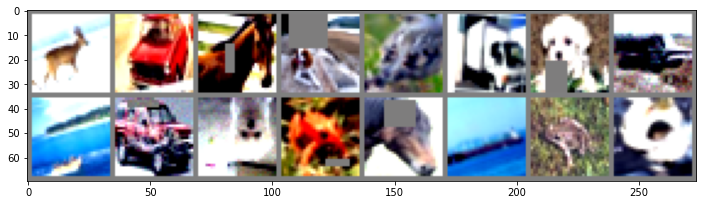

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision 

# functions to show an image
cifar_dataset=Cifar10DataLoader(config)
classes= config['data_loader']['classes']
fig, ax = plt.subplots(figsize=(12, 12))

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(cifar_dataset.train_loader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images[:16]))

## Trigger training

In [ ]:
exp_metrics={}
experiment_name=config['model_params']['experiment_name']

trigger_training=TriggerEngine(config)

# trigger_training.
(exp_metrics[experiment_name]),model = trigger_training.run_experiment()
trigger_training.save_experiment(model,experiment_name)

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


  0%|          | 0/196 [00:00<?, ?it/s]

Epoch 1:


Loss=1.4957499504089355 Batch_id=195 LR=0.00076 Accuracy=38.36: 100%|██████████| 196/196 [00:15<00:00, 12.92it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0052, Accuracy: 5218/10000 (52.18%)

Epoch 2:


Loss=1.5297664403915405 Batch_id=195 LR=0.00122 Accuracy=52.25: 100%|██████████| 196/196 [00:15<00:00, 12.98it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0045, Accuracy: 5948/10000 (59.48%)

Epoch 3:


Loss=1.1846017837524414 Batch_id=195 LR=0.00198 Accuracy=57.91: 100%|██████████| 196/196 [00:15<00:00, 13.04it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0039, Accuracy: 6457/10000 (64.57%)

Epoch 4:


Loss=1.241011619567871 Batch_id=195 LR=0.00298 Accuracy=60.74: 100%|██████████| 196/196 [00:15<00:00, 13.01it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0041, Accuracy: 6513/10000 (65.13%)

Epoch 5:


Loss=1.1074535846710205 Batch_id=195 LR=0.00420 Accuracy=63.33: 100%|██████████| 196/196 [00:15<00:00, 12.96it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0039, Accuracy: 6657/10000 (66.57%)

Epoch 6:


Loss=1.002901315689087 Batch_id=195 LR=0.00558 Accuracy=64.56: 100%|██████████| 196/196 [00:15<00:00, 12.93it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 6983/10000 (69.83%)

Epoch 7:


Loss=0.8868408203125 Batch_id=195 LR=0.00705 Accuracy=65.95: 100%|██████████| 196/196 [00:15<00:00, 12.92it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0039, Accuracy: 6682/10000 (66.82%)

Epoch 8:


Loss=1.0098557472229004 Batch_id=195 LR=0.00856 Accuracy=66.22: 100%|██████████| 196/196 [00:15<00:00, 12.93it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0038, Accuracy: 6722/10000 (67.22%)

Epoch 9:


Loss=0.886761486530304 Batch_id=195 LR=0.01003 Accuracy=66.95: 100%|██████████| 196/196 [00:15<00:00, 12.88it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0032, Accuracy: 7280/10000 (72.80%)

Epoch 10:


Loss=0.9908158183097839 Batch_id=195 LR=0.01140 Accuracy=67.93: 100%|██████████| 196/196 [00:15<00:00, 12.88it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0036, Accuracy: 6857/10000 (68.57%)

Epoch 11:


Loss=1.1263459920883179 Batch_id=195 LR=0.01262 Accuracy=67.95: 100%|██████████| 196/196 [00:15<00:00, 12.89it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0037, Accuracy: 6804/10000 (68.04%)

Epoch 12:


Loss=0.921761155128479 Batch_id=195 LR=0.01363 Accuracy=68.68: 100%|██████████| 196/196 [00:15<00:00, 12.90it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0038, Accuracy: 6822/10000 (68.22%)

Epoch 13:


Loss=0.9248211979866028 Batch_id=195 LR=0.01438 Accuracy=68.83: 100%|██████████| 196/196 [00:15<00:00, 12.92it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 6914/10000 (69.14%)

Epoch 14:


Loss=0.9497756958007812 Batch_id=195 LR=0.01484 Accuracy=68.75: 100%|██████████| 196/196 [00:15<00:00, 12.97it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0032, Accuracy: 7256/10000 (72.56%)

Epoch 15:


Loss=0.9765684008598328 Batch_id=195 LR=0.01500 Accuracy=69.11: 100%|██████████| 196/196 [00:15<00:00, 12.85it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0030, Accuracy: 7392/10000 (73.92%)

Epoch 16:


Loss=0.9948726892471313 Batch_id=195 LR=0.01497 Accuracy=69.27: 100%|██████████| 196/196 [00:15<00:00, 12.81it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0032, Accuracy: 7251/10000 (72.51%)

Epoch 17:


Loss=0.8335874676704407 Batch_id=195 LR=0.01488 Accuracy=69.44: 100%|██████████| 196/196 [00:15<00:00, 12.76it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 7101/10000 (71.01%)

Epoch 18:


Loss=0.9952966570854187 Batch_id=195 LR=0.01473 Accuracy=69.75: 100%|██████████| 196/196 [00:15<00:00, 12.93it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0040, Accuracy: 6766/10000 (67.66%)

Epoch 19:


Loss=0.8201702237129211 Batch_id=195 LR=0.01452 Accuracy=69.73: 100%|██████████| 196/196 [00:15<00:00, 12.86it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0032, Accuracy: 7229/10000 (72.29%)

Epoch 20:


Loss=0.7245044112205505 Batch_id=195 LR=0.01426 Accuracy=69.96: 100%|██████████| 196/196 [00:15<00:00, 12.88it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0031, Accuracy: 7316/10000 (73.16%)

Epoch 21:


Loss=0.9951598048210144 Batch_id=195 LR=0.01394 Accuracy=70.28: 100%|██████████| 196/196 [00:15<00:00, 12.59it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0029, Accuracy: 7498/10000 (74.98%)

Epoch 22:


Loss=0.7923924326896667 Batch_id=195 LR=0.01357 Accuracy=70.16: 100%|██████████| 196/196 [00:15<00:00, 12.81it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0029, Accuracy: 7469/10000 (74.69%)

Epoch 23:


Loss=0.79888916015625 Batch_id=195 LR=0.01315 Accuracy=70.39: 100%|██████████| 196/196 [00:15<00:00, 12.80it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0032, Accuracy: 7217/10000 (72.17%)

Epoch 24:


Loss=0.6258423924446106 Batch_id=195 LR=0.01268 Accuracy=70.55: 100%|██████████| 196/196 [00:15<00:00, 12.78it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0030, Accuracy: 7396/10000 (73.96%)

Epoch 25:


Loss=0.525528609752655 Batch_id=195 LR=0.01217 Accuracy=70.58: 100%|██████████| 196/196 [00:15<00:00, 12.77it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 7543/10000 (75.43%)

Epoch 26:


Loss=0.6302924156188965 Batch_id=195 LR=0.01163 Accuracy=70.96: 100%|██████████| 196/196 [00:15<00:00, 12.66it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0037, Accuracy: 6885/10000 (68.85%)

Epoch 27:


Loss=0.8823761940002441 Batch_id=195 LR=0.01105 Accuracy=71.70: 100%|██████████| 196/196 [00:15<00:00, 12.64it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0027, Accuracy: 7610/10000 (76.10%)

Epoch 28:


Loss=0.8771452903747559 Batch_id=195 LR=0.01044 Accuracy=71.58: 100%|██████████| 196/196 [00:15<00:00, 12.83it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0029, Accuracy: 7526/10000 (75.26%)

Epoch 29:


Loss=0.5918877720832825 Batch_id=195 LR=0.00981 Accuracy=71.95: 100%|██████████| 196/196 [00:15<00:00, 12.78it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 7609/10000 (76.09%)

Epoch 30:


Loss=0.7176018357276917 Batch_id=195 LR=0.00917 Accuracy=72.37: 100%|██████████| 196/196 [00:15<00:00, 12.77it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0027, Accuracy: 7629/10000 (76.29%)

Epoch 31:


Loss=0.7920304536819458 Batch_id=195 LR=0.00850 Accuracy=72.95: 100%|██████████| 196/196 [00:15<00:00, 12.68it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0027, Accuracy: 7652/10000 (76.52%)

Epoch 32:


Loss=1.012771725654602 Batch_id=195 LR=0.00783 Accuracy=73.31: 100%|██████████| 196/196 [00:15<00:00, 12.77it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0025, Accuracy: 7846/10000 (78.46%)

Epoch 33:


Loss=0.7633283734321594 Batch_id=195 LR=0.00716 Accuracy=73.73: 100%|██████████| 196/196 [00:15<00:00, 12.79it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0025, Accuracy: 7824/10000 (78.24%)

Epoch 34:


Loss=0.8091548681259155 Batch_id=195 LR=0.00649 Accuracy=74.26: 100%|██████████| 196/196 [00:15<00:00, 12.78it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0024, Accuracy: 7948/10000 (79.48%)

Epoch 35:


Loss=0.6131895780563354 Batch_id=195 LR=0.00583 Accuracy=75.10: 100%|██████████| 196/196 [00:15<00:00, 12.79it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0023, Accuracy: 8068/10000 (80.68%)

Epoch 36:


Loss=0.5947357416152954 Batch_id=195 LR=0.00518 Accuracy=75.76: 100%|██████████| 196/196 [00:15<00:00, 12.73it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0023, Accuracy: 7974/10000 (79.74%)

Epoch 37:


Loss=0.7889128923416138 Batch_id=195 LR=0.00455 Accuracy=76.01: 100%|██████████| 196/196 [00:15<00:00, 12.77it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0021, Accuracy: 8144/10000 (81.44%)

Epoch 38:


Loss=0.496451199054718 Batch_id=195 LR=0.00394 Accuracy=77.00: 100%|██████████| 196/196 [00:15<00:00, 12.77it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 8054/10000 (80.54%)

Epoch 39:


Loss=0.7112814784049988 Batch_id=195 LR=0.00337 Accuracy=77.43: 100%|██████████| 196/196 [00:15<00:00, 12.63it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 8140/10000 (81.40%)

Epoch 40:


Loss=0.6004449725151062 Batch_id=195 LR=0.00282 Accuracy=78.48: 100%|██████████| 196/196 [00:15<00:00, 12.51it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0020, Accuracy: 8222/10000 (82.22%)

Epoch 41:


Loss=0.4076898694038391 Batch_id=195 LR=0.00231 Accuracy=79.33: 100%|██████████| 196/196 [00:15<00:00, 12.60it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0020, Accuracy: 8245/10000 (82.45%)

Epoch 42:


Loss=0.7799887657165527 Batch_id=195 LR=0.00185 Accuracy=80.01: 100%|██████████| 196/196 [00:15<00:00, 12.72it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0019, Accuracy: 8417/10000 (84.17%)

Epoch 43:


Loss=0.4718307554721832 Batch_id=195 LR=0.00143 Accuracy=80.49: 100%|██████████| 196/196 [00:15<00:00, 12.73it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0019, Accuracy: 8410/10000 (84.10%)

Epoch 44:


Loss=0.6742515563964844 Batch_id=195 LR=0.00106 Accuracy=81.28: 100%|██████████| 196/196 [00:15<00:00, 12.85it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0018, Accuracy: 8421/10000 (84.21%)

Epoch 45:


Loss=0.6440056562423706 Batch_id=195 LR=0.00074 Accuracy=81.66: 100%|██████████| 196/196 [00:15<00:00, 12.64it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0018, Accuracy: 8496/10000 (84.96%)

Epoch 46:


Loss=0.6459113359451294 Batch_id=195 LR=0.00048 Accuracy=82.12: 100%|██████████| 196/196 [00:15<00:00, 12.70it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0018, Accuracy: 8523/10000 (85.23%)

Epoch 47:


Loss=0.5673949122428894 Batch_id=195 LR=0.00027 Accuracy=82.75: 100%|██████████| 196/196 [00:15<00:00, 12.62it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0017, Accuracy: 8576/10000 (85.76%)

Epoch 48:


Loss=0.5835553407669067 Batch_id=195 LR=0.00012 Accuracy=82.76: 100%|██████████| 196/196 [00:15<00:00, 12.79it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0017, Accuracy: 8580/10000 (85.80%)

Epoch 49:


Loss=0.7129141092300415 Batch_id=195 LR=0.00003 Accuracy=83.42: 100%|██████████| 196/196 [00:15<00:00, 12.74it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0017, Accuracy: 8554/10000 (85.54%)

Epoch 50:


Loss=0.5336853265762329 Batch_id=195 LR=0.00000 Accuracy=83.37: 100%|██████████| 196/196 [00:15<00:00, 12.66it/s]



Test set: Average loss: 0.0017, Accuracy: 8568/10000 (85.68%)

Saving the model for cifar10_with_skipconnection


## Model summary

In [ ]:
trigger_training.model_summary(model,(3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
              ReLU-2           [-1, 64, 32, 32]               0
       BatchNorm2d-3           [-1, 64, 32, 32]             128
         Dropout2d-4           [-1, 64, 32, 32]               0
            Conv2d-5          [-1, 128, 32, 32]          73,728
              ReLU-6          [-1, 128, 32, 32]               0
       BatchNorm2d-7          [-1, 128, 32, 32]             256
         Dropout2d-8          [-1, 128, 32, 32]               0
            Conv2d-9           [-1, 32, 16, 16]           4,128
             ReLU-10           [-1, 32, 16, 16]               0
           Conv2d-11           [-1, 32, 16, 16]           9,216
             ReLU-12           [-1, 32, 16, 16]               0
      BatchNorm2d-13           [-1, 32, 16, 16]              64
        Dropout2d-14           [-1, 32,

## Missclassification

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

Total wrong predictions are 1432


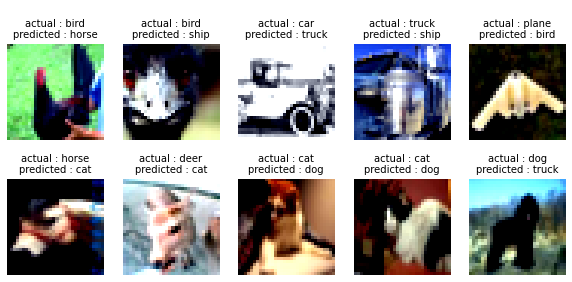

In [ ]:
model = torch.load(f'./saved_models/{experiment_name}.pt')
model.eval()
trigger_training.wrong_predictions(model)

## Plots for Validation Loss and Accuracy

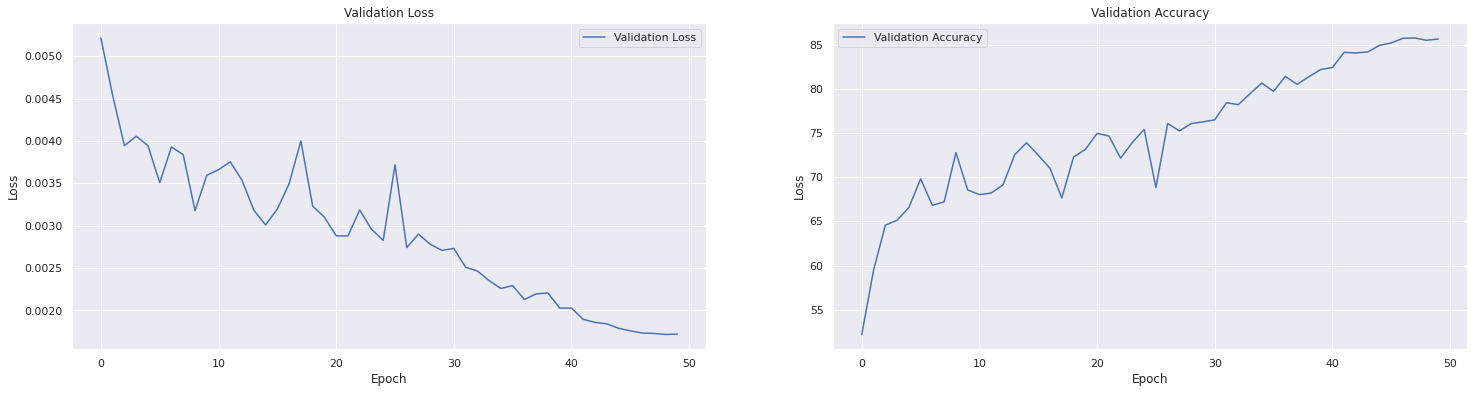

In [ ]:
plot_metrics.plot_metrics(exp_metrics[experiment_name])

## Accuracy for each class

In [ ]:
helper.class_level_accuracy(model, cifar_dataset.test_loader, device, classes)

Accuracy of plane : 89 %
Accuracy of   car : 94 %
Accuracy of  bird : 77 %
Accuracy of   cat : 70 %
Accuracy of  deer : 84 %
Accuracy of   dog : 75 %
Accuracy of  frog : 92 %
Accuracy of horse : 89 %
Accuracy of  ship : 92 %
Accuracy of truck : 90 %
